In [43]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

data = pd.read_csv('../data/raw/data.csv')


<Axes: xlabel='x', ylabel='y'>

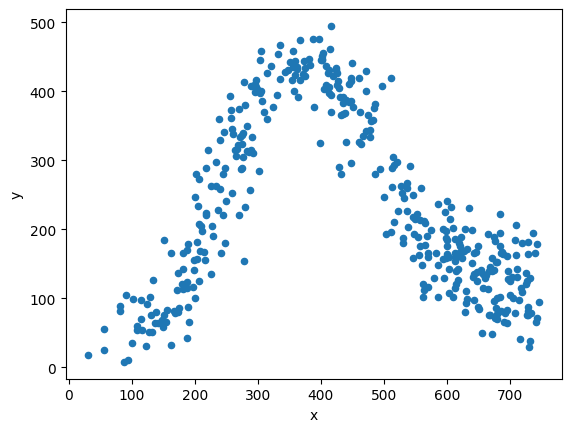

In [29]:
data.plot(kind='scatter', x='x', y='y')

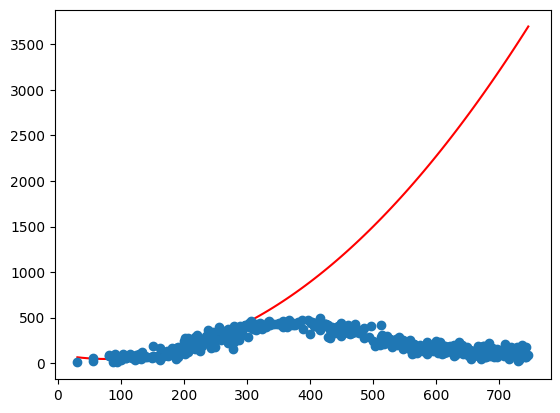

In [33]:
data_subs = data[data.x < 220]
poly_fit = np.polyfit(data_subs['x'], data_subs['y'], 2)
x_vals = np.linspace(data['x'].min(), data['x'].max(), 100)
plt.plot(x_vals, np.polyval(poly_fit, x_vals), color='red')
plt.plot(data['x'], data['y'], 'o')
plt.show()

In [141]:
# b0 * exp(-b1(x - b2)^2) + b3 + b4 * x + b5 * x^2 + b6 * x^3 + b7 * x^4 + b8 * sin(b9 * x + b10) + b11 * cos(b12 * x + b13)
data_subs = data[data.x < 220]

def con_beta_5_neg(betas: list) -> float:
    return -betas[5]

def con_beta_0_pos(betas: list) -> float:
    return betas[0]

def cond_beta_1_pos(betas: list) -> float:
    return betas[1]

def cond_beta_2_pos(betas: list) -> float:
    return betas[2]

def opt_fun(b: list, d) -> float:
    x = d['x']
    y_hat = b[0] * np.exp(-b[1] * (x - b[2])**2 + b[14] * x + b[15] + -b[17]*np.abs(x - b[16]))+ b[5] * (x-b[6])**2 \
        + b[3] + b[4] * (x-b[7]) #+ b[8] * np.sin(b[9] * x + b[10]) + b[11] * np.cos(b[12] * x + b[13])
    return np.mean((d['y'] - y_hat)**2)

def poly_fun(b: list, x: np.array) -> np.array:
    return b[0] * np.exp(-b[1] * (x - b[2])**2 + b[14] * x + b[15]) + b[5] * (x-b[6])**2 \
        + b[3] + b[4] * (x-b[7]) #+ b[8] *np.sin(b[9] * x + b[10]) + b[11] * np.cos(b[12] * x + b[13])
bounds = [(0, None), (0, None), (0, None), (None, None), (None, None), (None, 0), (None, None), (None, None), (None, None), (None, None), (None, None), (None, None), (None, None), (None, None), (None, None), (None, None), (0, None), (0, None)]
from scipy.optimize import minimize
x0 = [1, 1, 1, 1, -0.01, 0, 0, -0.00001, 0, 0, 0, 0, 0, 0]
x0 = np.ones(18)
#sol = minimize(opt_fun, x0, method = "COBYLA", constraints=[{'type': 'ineq', 'fun': con_beta_5_neg}, {'type': 'ineq', 'fun': con_beta_0_pos}, {'type': 'ineq', 'fun': cond_beta_1_pos}, {'type': 'ineq', 'fun': cond_beta_2_pos}])
sol = minimize(lambda b: opt_fun([*b], data),x0=x0, bounds=bounds, tol=1e-7)

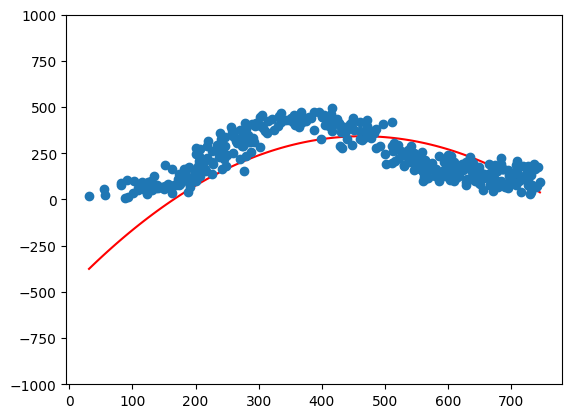

[ 0.00000000e+00  0.00000000e+00  0.00000000e+00 -5.78194836e+00
  8.27663314e-01 -3.82695764e-03  3.56136254e+02 -1.02581737e+01
 -2.09563833e+01  5.05795342e-01 -1.67333642e+01 -1.51623753e+01
 -1.99424514e+01 -2.55313057e+00 -5.89201034e+00 -1.99638867e+00
  0.00000000e+00  0.00000000e+00] 13288.432608855046


/Users/silaskoemen/Documents/Projects/ForecastPNN/.fpnn_venv/lib/python3.11/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*inputs, **kwargs)
/var/folders/xr/mqd4g8995xqfhcvcyvr2smdc0000gn/T/ipykernel_15548/740503197.py:23: RuntimeWarning: overflow encountered in exp
  return b[0] * np.exp(-b[1] * (x - b[2])**2 + b[14] * x + b[15]) + b[5] * (x-b[6])**2 \
/var/folders/xr/mqd4g8995xqfhcvcyvr2smdc0000gn/T/ipykernel_15548/740503197.py:23: RuntimeWarning: invalid value encountered in multiply
  return b[0] * np.exp(-b[1] * (x - b[2])**2 + b[14] * x + b[15]) + b[5] * (x-b[6])**2 \


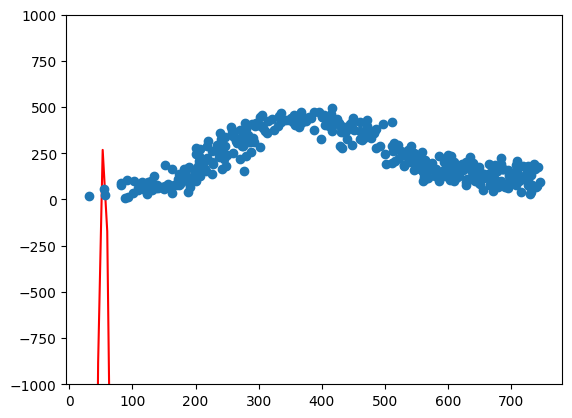

[  0.           0.           0.         -27.94630534   5.49419722
 -15.26178525  54.29203422  -6.75815588 -21.81425739   4.72411607
 -13.43718796  -2.18251797  -4.49926152  -4.13633464   6.30961594
 -11.64616699   0.           0.        ] 644236594.6671668


/Users/silaskoemen/Documents/Projects/ForecastPNN/.fpnn_venv/lib/python3.11/site-packages/scipy/optimize/_numdiff.py:576: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0


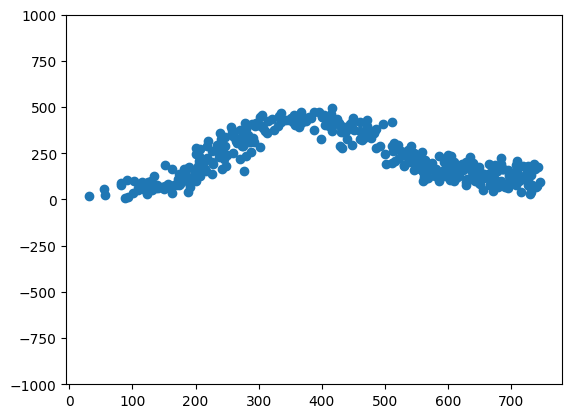

[  3.79534917   0.           0.          -4.29793858 -14.60362644
 -20.5723845  -24.64319821 -14.37810011 -10.2373717   -9.67662647
 -12.57966213 -11.26629934 -17.68751368 -10.48819199   8.98914425
  -1.44834639   0.           6.20828983] nan


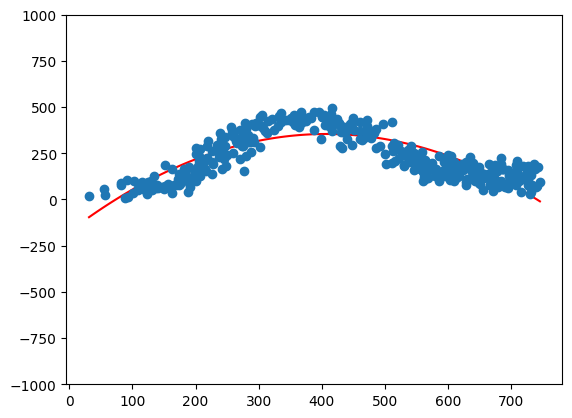

[ 0.00000000e+00  0.00000000e+00  0.00000000e+00 -2.55285458e+01
  1.13653312e+00 -3.18082966e-03  2.28791724e+02 -1.61334276e+01
 -1.44894485e+01 -5.85156990e+00  2.66695375e+00 -7.50751213e+00
 -1.11664128e+01 -1.47760769e+01 -1.91919851e+01 -4.80360601e+00
  0.00000000e+00  0.00000000e+00] 5365.135252253052


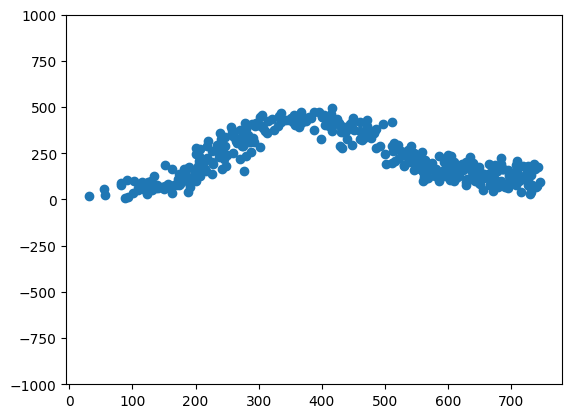

[  0.           0.           0.         -18.05150291 -16.54064922
  -8.19336207  61.6175192   -8.16335008 -12.84397152 -18.19086419
 -11.09503008 -18.90177286  -5.9689439   11.99872974  15.78572931
  -8.82259583   0.           0.        ] 68370198.32171214


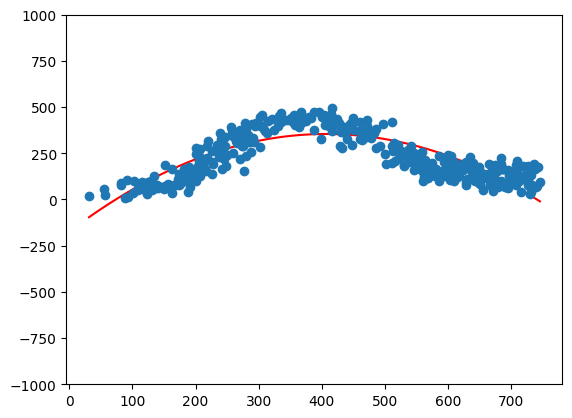

[ 0.00000000e+00  5.70891502e+00  0.00000000e+00  4.21039144e+00
  1.05472092e+00 -3.18084296e-03  2.41652710e+02 -7.43483378e+00
 -8.60779288e+00  9.00278068e-01 -1.30777783e+01 -1.06587327e+01
 -3.44202131e+00 -9.08508837e+00 -4.00085273e+00 -1.72287768e-01
  0.00000000e+00  1.10954226e+01] 5365.1352534745565


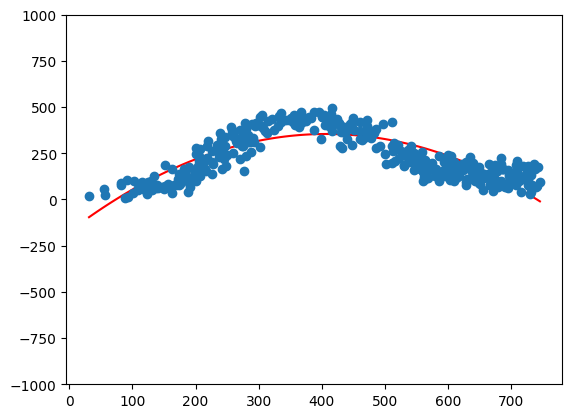

[ 0.00000000e+00  0.00000000e+00  0.00000000e+00 -1.76146894e+01
  1.13668491e+00 -3.18084889e-03  2.28769032e+02 -9.13859626e+00
 -1.83680681e+01 -8.82429689e+00 -1.46317072e+01 -6.87126778e+00
 -1.04918816e+01 -1.89456885e+01 -1.02574270e+01 -6.34419519e+00
  0.00000000e+00  0.00000000e+00] 5365.135254339843


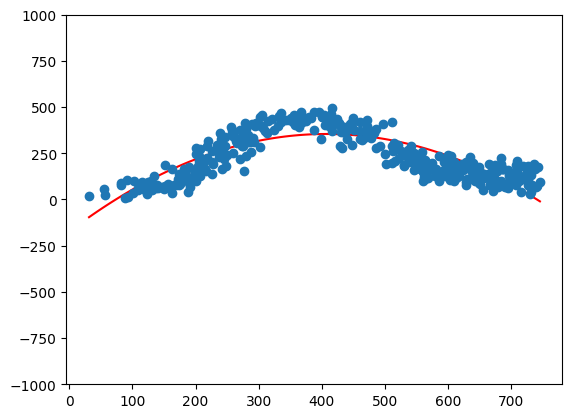

[ 7.60456364e-01  1.32797544e+00  0.00000000e+00 -2.56005306e+01
  1.17201001e+00 -3.18084121e-03  2.23215593e+02 -8.86573917e+00
 -7.54010974e+00 -1.58037305e+01 -1.47307506e+00 -8.84388323e+00
 -1.93857125e+00 -2.59380877e+01 -2.51259773e+01 -1.70718941e+01
  0.00000000e+00  0.00000000e+00] 5365.135253408133


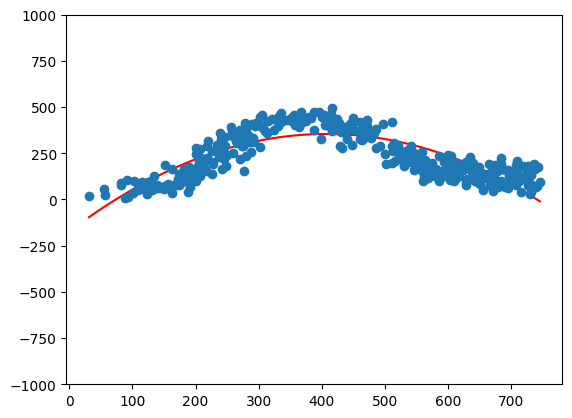

[ 0.00000000e+00  0.00000000e+00  0.00000000e+00 -6.04665249e+00
  1.07640872e+00 -3.18084965e-03  2.38244074e+02 -1.19792320e+01
 -2.82035594e+01 -1.36364581e+01 -1.50237517e+01 -1.22743990e+01
 -2.51293312e+01 -8.55526264e+00 -1.87488209e+01 -1.75368361e+01
  0.00000000e+00  9.24033424e+00] 5365.135254339854


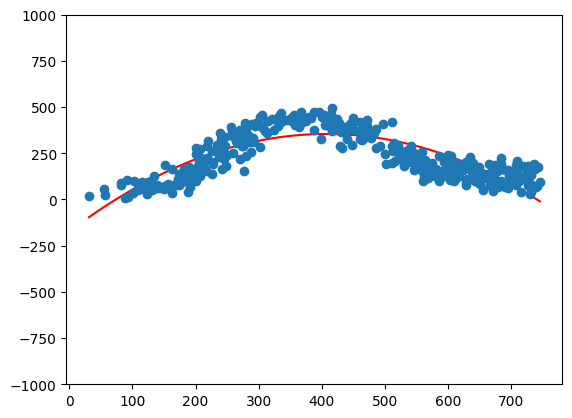

[ 0.00000000e+00  0.00000000e+00  1.27122204e+01 -2.52487982e+01
  1.18372367e+00 -3.18085354e-03  2.21375274e+02 -6.28107036e+00
 -1.47213029e+01 -1.82963553e+01 -1.28896148e+01 -9.75377167e+00
  1.16840245e+01 -4.40994965e+00 -1.29109338e+01 -1.90273436e+00
  0.00000000e+00  0.00000000e+00] 5365.135254860826


In [142]:
for tries in range(10):
    sol = minimize(lambda b: opt_fun([*b], data), x0=np.random.normal(-10, 10, 18), bounds=bounds, tol=1e-8)
    x_vals = np.linspace(data['x'].min(), data['x'].max(), 100)
    plt.plot(x_vals, poly_fun(sol.x, x_vals), color='red')
    plt.plot(data['x'], data['y'], 'o')
    plt.ylim(-1000, 1000)
    plt.show()
    print(sol.x, sol.fun)

(array([ 2.,  5., 11., 27., 36., 65., 74., 62., 83., 70., 63., 66., 56.,
        57., 46., 45., 38., 27., 28., 21., 21., 20., 14., 19., 12.,  8.,
         8.,  0.,  5.,  4.,  1.,  2.,  1.,  1.,  0.,  1.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  1.]),
 array([18., 19., 20., 21., 22., 23., 24., 25., 26., 27., 28., 29., 30.,
        31., 32., 33., 34., 35., 36., 37., 38., 39., 40., 41., 42., 43.,
        44., 45., 46., 47., 48., 49., 50., 51., 52., 53., 54., 55., 56.,
        57., 58., 59., 60., 61., 62., 63.]),
 <BarContainer object of 45 artists>)

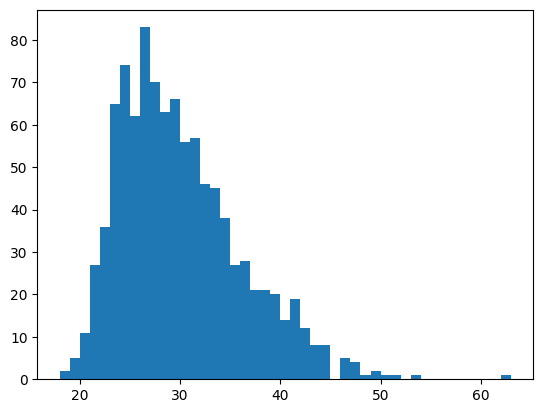

In [61]:
from scipy.stats import skewnorm
import matplotlib.pyplot as plt
import numpy as np

mu_real, sigma_real, alpha_real = 22, 10, 5
samples = skewnorm.rvs(alpha_real, mu_real, sigma_real, size=1000, random_state=42)
samples = np.round(samples)
plt.hist(samples, bins=np.arange(min(samples), max(samples) + 1, 1))

In [86]:
import scipy
from tqdm import tqdm

def nl_skewnormal(params):
    alpha, mu, sigma = params
    # Add penalty for invalid parameter values
    if sigma <= 0:
        return np.inf
    return -np.sum(np.log(skewnorm.pdf(samples, alpha, mu, sigma) + 1e-10))

def em_algorithm_skewnormal(samples, n_tries=10):
    best_params = None
    best_nll = np.inf
    
    # Initial guesses based on data statistics
    sample_mean = np.mean(samples)
    sample_std = np.std(samples)
    
    # Parameter bounds
    bounds = [
        (-100, 100),    # alpha
        (sample_mean - 3*sample_std, sample_mean + 3*sample_std),  # mu
        (0.1*sample_std, 10*sample_std)  # sigma
    ]
    
    for _ in tqdm(range(n_tries)):
        # Random initial values within reasonable ranges
        x0 = [
            np.random.uniform(-5, 5),  # alpha
            np.random.normal(sample_mean, sample_std/2),  # mu
            np.random.uniform(sample_std/2, sample_std*2)  # sigma
        ]
        
        # Try different optimization methods
        for method in ['Nelder-Mead', 'BFGS', 'Powell']:
            try:
                result = scipy.optimize.minimize(
                    nl_skewnormal, 
                    x0=x0,
                    method=method,
                    bounds=bounds if method == 'Powell' else None
                )
                
                if result.success and result.fun < best_nll:
                    best_nll = result.fun
                    best_params = result.x
            except:
                continue
                
    if best_params is None:
        raise RuntimeError("Optimization failed to find valid parameters")
        
    return best_params[1], abs(best_params[2]), best_params[0]  # mu, sigma, alpha

mu_algo, sigma_algo, alpha_algo = em_algorithm_skewnormal(samples[samples > 25])
print(f"Optimized parameters: mu={mu_algo:.2f}, sigma={sigma_algo:.2f}, alpha={alpha_algo:.2f}")

 10%|█         | 1/10 [00:00<00:01,  7.63it/s]/Users/silaskoemen/Documents/Projects/ForecastPNN/.fpnn_venv/lib/python3.11/site-packages/scipy/optimize/_numdiff.py:576: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0
 30%|███       | 3/10 [00:00<00:00,  7.91it/s]/Users/silaskoemen/Documents/Projects/ForecastPNN/.fpnn_venv/lib/python3.11/site-packages/scipy/optimize/_numdiff.py:576: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0
 70%|███████   | 7/10 [00:00<00:00,  7.36it/s]/Users/silaskoemen/Documents/Projects/ForecastPNN/.fpnn_venv/lib/python3.11/site-packages/scipy/optimize/_numdiff.py:576: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0
100%|██████████| 10/10 [00:01<00:00,  8.51it/s]

Optimized parameters: mu=21.89, sigma=9.81, alpha=5.33


Real parameters: mu=22, sigma=10, alpha=5
Fitted parameters: mu=21.89, sigma=9.81, alpha=5.33


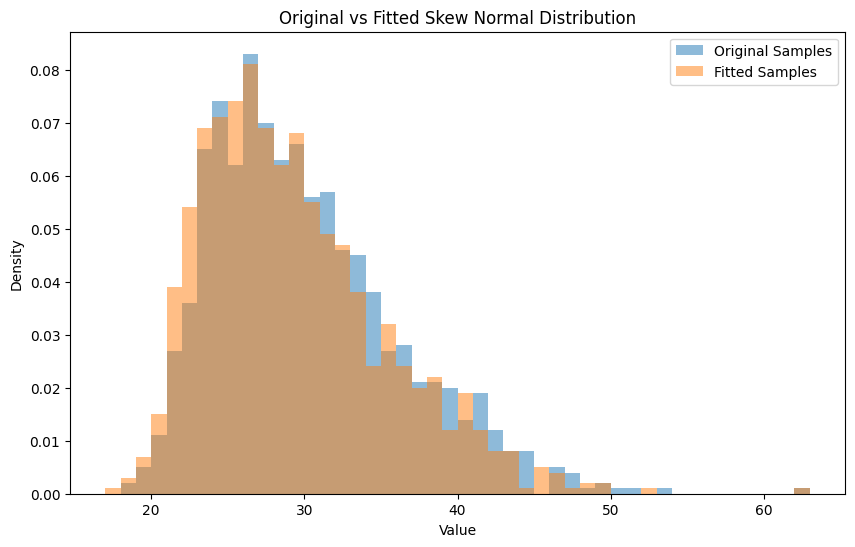

In [87]:
print(f"Real parameters: mu={mu_real}, sigma={sigma_real}, alpha={alpha_real}")
print(f"Fitted parameters: mu={mu_algo:.2f}, sigma={sigma_algo:.2f}, alpha={alpha_algo:.2f}")
samples_opt = skewnorm.rvs(alpha_algo, mu_algo, sigma_algo, size=1000, random_state=42)

# Create integer bins that cover both datasets
min_val = int(min(min(samples), min(samples_opt)))
max_val = int(np.ceil(max(max(samples), max(samples_opt))))
bins = np.arange(min_val, max_val + 1)

plt.figure(figsize=(10, 6))
plt.hist(samples, bins=bins, alpha=0.5, label='Original Samples', density=True)
plt.hist(samples_opt, bins=bins, alpha=0.5, label='Fitted Samples', density=True)
plt.legend(loc='upper right')
plt.xlabel('Value')
plt.ylabel('Density')
plt.title('Original vs Fitted Skew Normal Distribution')
plt.show()